Matplotlib is building the font cache; this may take a moment.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


C:\Users\u21608611\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.3515 - loss: 1.8155 - val_accuracy: 0.5200 - val_loss: 1.3455
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5535 - loss: 1.2735 - val_accuracy: 0.5494 - val_loss: 1.2559
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6025 - loss: 1.1467 - val_accuracy: 0.5997 - val_loss: 1.1645
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6333 - loss: 1.0628 - val_accuracy: 0.6175 - val_loss: 1.1012
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6578 - loss: 0.9856 - val_accuracy: 0.6225 - val_loss: 1.0943
Epoch 1/5


C:\Users\u21608611\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2197 - loss: 2.1200 - val_accuracy: 0.3048 - val_loss: 1.8969
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3033 - loss: 1.9021 - val_accuracy: 0.3250 - val_loss: 1.8318
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3384 - loss: 1.8114 - val_accuracy: 0.3307 - val_loss: 1.8534
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3216 - loss: 1.8541 - val_accuracy: 0.3643 - val_loss: 1.7380
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3382 - loss: 1.8050 - val_accuracy: 0.3403 - val_loss: 1.8063
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6214 - loss: 1.0827
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3491 - loss: 1.7925
CNN Test Accuracy: 0.6173999905586243
RNN Test Accuracy: 0.3465000092983246


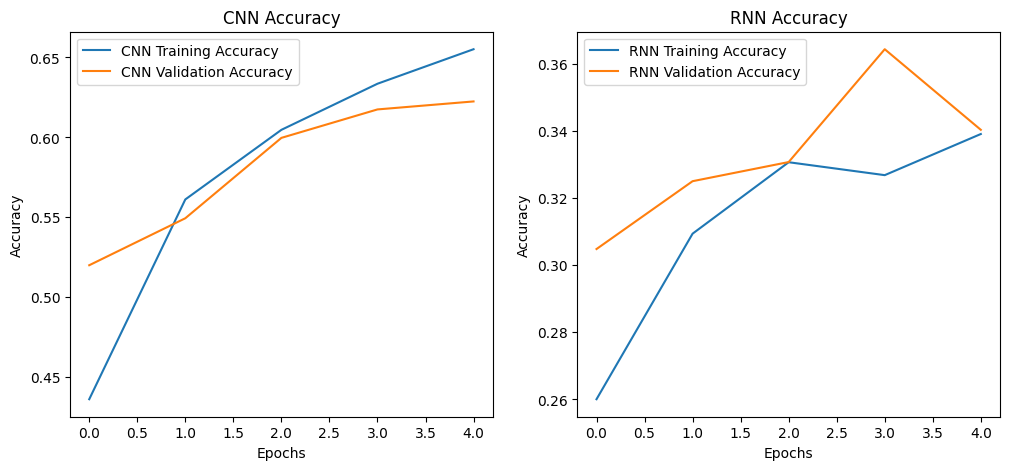

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, SimpleRNN, Reshape
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for CNN (32x32x3)
x_train_cnn = x_train  # No need to reshape, already in the correct shape
x_test_cnn = x_test

# Reshape data for RNN (32 timesteps, 96 features)
x_train_rnn = x_train.reshape(-1, 32, 32 * 3)  # Flatten the 32x32x3 images
x_test_rnn = x_test.reshape(-1, 32, 32 * 3)

# Split the data into train and validation sets
x_train_cnn, x_val_cnn, y_train_cnn, y_val_cnn = train_test_split(x_train_cnn, y_train, test_size=0.2, random_state=42)
x_train_rnn, x_val_rnn, y_train_rnn, y_val_rnn = train_test_split(x_train_rnn, y_train, test_size=0.2, random_state=42)

# CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(x_train_cnn, y_train_cnn, validation_data=(x_val_cnn, y_val_cnn), epochs=5, batch_size=128)

# RNN model
rnn_model = Sequential([
    SimpleRNN(128, input_shape=(32, 32 * 3)),  # Adjust input shape
    Dense(10, activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(x_train_rnn, y_train_rnn, validation_data=(x_val_rnn, y_val_rnn), epochs=5, batch_size=128)

# Evaluate both models on the test set
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test)
rnn_test_loss, rnn_test_acc = rnn_model.evaluate(x_test_rnn, y_test)

# Print the results
print(f"CNN Test Accuracy: {cnn_test_acc}")
print(f"RNN Test Accuracy: {rnn_test_acc}")

# Plot the training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('RNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 12.9/12.9 MB 73.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 86.6 MB/s eta 0:00:00
Epoch 1/5


C:\Users\u21608611\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.6086 - val_loss: 0.5632
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.5607 - val_loss: 0.5606
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.5593 - val_loss: 0.5595
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.5577 - val_loss: 0.5588
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.5578 - val_loss: 0.5586


C:\Users\u21608611\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.6724 - val_loss: 0.6462
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.6386 - val_loss: 0.6286
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.6224 - val_loss: 0.6215
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.6156 - val_loss: 0.6119
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.6110 - val_loss: 0.6076
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


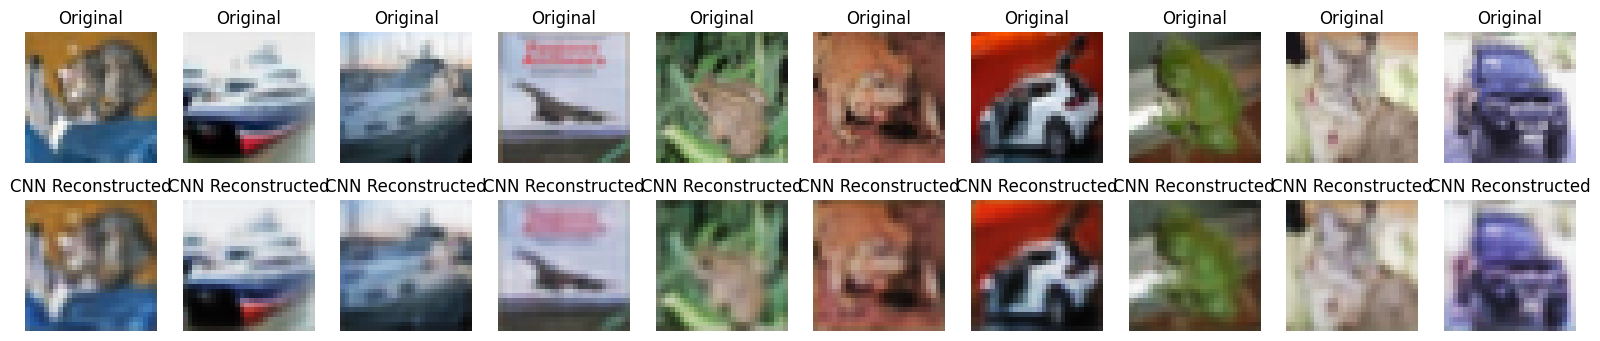

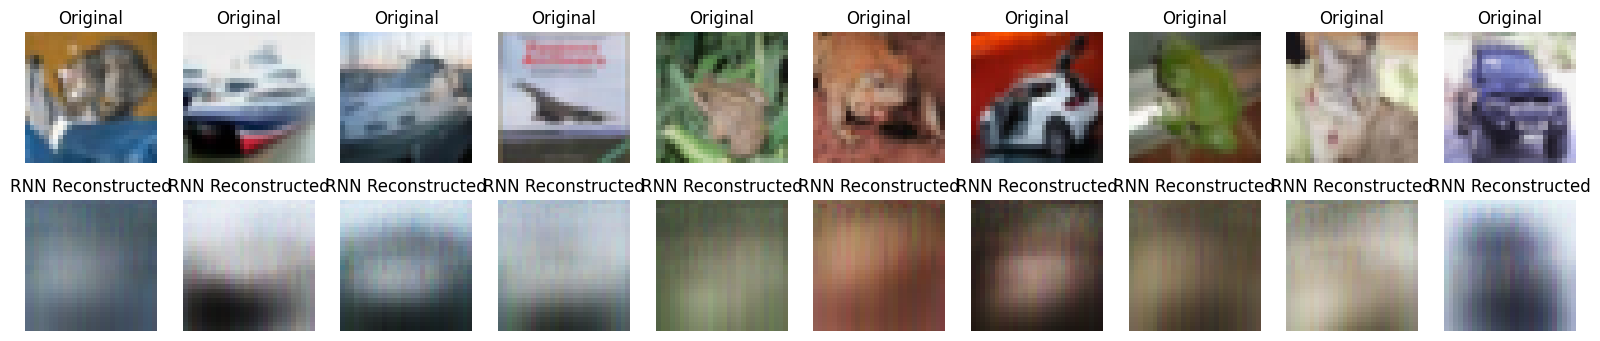

In [5]:
!pip install scikit-image

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, SimpleRNN, RepeatVector, TimeDistributed
from tensorflow.keras.datasets import cifar10
from skimage.transform import resize  # Use skimage for resizing
import matplotlib.pyplot as plt

# Load the cifar10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Resize images to 28x28
x_train_resized = np.array([resize(img, (28, 28)) for img in x_train])
x_test_resized = np.array([resize(img, (28, 28)) for img in x_test])

# Reshape data for CNN and RNN
x_train_cnn = x_train_resized.reshape(-1, 28, 28, 3)
x_test_cnn = x_test_resized.reshape(-1, 28, 28, 3)
x_train_rnn = x_train_resized.reshape(-1, 28, 28 * 3)
x_test_rnn = x_test_resized.reshape(-1, 28, 28 * 3)

# CNN autoencoder model
cnn_autoencoder = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 3)),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),
    Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')
])

cnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
cnn_autoencoder.fit(x_train_cnn, x_train_cnn, epochs=5, batch_size=128, validation_split=0.2)

# RNN autoencoder model
rnn_autoencoder = Sequential([
    SimpleRNN(128, activation='relu', input_shape=(28, 28 * 3), return_sequences=False),
    RepeatVector(28),
    SimpleRNN(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(28 * 3, activation='sigmoid'))
])

rnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
rnn_autoencoder.fit(x_train_rnn, x_train_rnn, epochs=5, batch_size=128, validation_split=0.2)

# Reconstruct images using both models
cnn_reconstructed = cnn_autoencoder.predict(x_test_cnn)
rnn_reconstructed = rnn_autoencoder.predict(x_test_rnn)

# Plot original and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_resized[i])
    plt.title("Original")
    plt.axis('off')

    # Display CNN reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(cnn_reconstructed[i])
    plt.title("CNN Reconstructed")
    plt.axis('off')

plt.show()

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_resized[i])
    plt.title("Original")
    plt.axis('off')

    # Display RNN reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(rnn_reconstructed[i].reshape(28, 28, 3))
    plt.title("RNN Reconstructed")
    plt.axis('off')

plt.show()


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, SimpleRNN, RepeatVector, TimeDistributed, LSTM, UpSampling2D
from tensorflow.keras.datasets import cifar10
from skimage.transform import resize  # Ensure you have skimage installed
import matplotlib.pyplot as plt

# Load and preprocess the cifar10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Resize images to 28x28
x_train_resized = np.array([resize(img, (28, 28)) for img in x_train])
x_test_resized = np.array([resize(img, (28, 28)) for img in x_test])

# Reshape data for CNN and RNN
x_train_cnn = x_train_resized.reshape(-1, 28, 28, 3)  # 3 for RGB
x_test_cnn = x_test_resized.reshape(-1, 28, 28, 3)
x_train_rnn = x_train_resized.reshape(-1, 28, 28 * 3)  # Flattened for RNN
x_test_rnn = x_test_resized.reshape(-1, 28, 28 * 3)

# Define CNN autoencoder model
cnn_autoencoder = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 3)),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),
    Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')
])

# Define RNN autoencoder model
rnn_autoencoder = Sequential([
    SimpleRNN(128, activation='relu', input_shape=(28, 28 * 3), return_sequences=False),
    RepeatVector(28),
    SimpleRNN(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(28 * 3, activation='sigmoid'))  # Flattened output
])

# Define LSTM autoencoder model
lstm_autoencoder = Sequential([
    LSTM(128, activation='relu', input_shape=(28, 28 * 3), return_sequences=False),
    RepeatVector(28),
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(28 * 3, activation='sigmoid'))
])

# Compile models
cnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
rnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
lstm_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Print summaries of the models
print("CNN Autoencoder Summary:")
cnn_autoencoder.summary()

print("\nRNN Autoencoder Summary:")
rnn_autoencoder.summary()

print("\nLSTM Autoencoder Summary:")
lstm_autoencoder.summary()


CNN Autoencoder Summary:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,011 (43.01 KB)

 Trainable params: 11,011 (43.01 KB)

 Non-trainable params: 0 (0.00 B)


RNN Autoencoder Summary:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 128)            │        27,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_2 (RepeatVector)  │ (None, 28, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 28, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 28, 84)         │        10,836 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,996 (277.33 KB)

 Trainable params: 70,996 (277.33 KB)

 Non-trainable params: 0 (0.00 B)


LSTM Autoencoder Summary:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │       109,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_3 (RepeatVector)  │ (None, 28, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 28, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 28, 84)         │        10,836 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,476 (982.33 KB)

 Trainable params: 251,476 (982.33 KB)

 Non-trainable params: 0 (0.00 B)